In [1]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM
using SSMCMain.ModifiedMiCRM.RandomSystems

In [2]:
using Base.Threads, OhMyThreads
using BenchmarkTools
using JLD2
using Geppetto
using Random, Distributions, StatsBase

using Optimization

In [3]:
using CairoMakie
using GLMakie
CairoMakie.activate!()
# display(GLMakie.Screen(), f.figure)

# Setup

In [4]:
function sigma_to_mu_ratio1()
    (2 / 3) / 2.355
end

sigma_to_mu_ratio1 (generic function with 1 method)

In [5]:
function threshold_func1(data)
    xx = sort(data)
    m = mean(xx)
    xx[findfirst(x -> x > m, xx)] - 100*eps()
end

threshold_func1 (generic function with 1 method)

# Testing

In [7]:
Ns = 10
Nr = 10

total_influx = 1. * Ns
sparsity_influx = 0.3
Kmean = total_influx / (sparsity_influx * Nr)
K = (Kmean, Kmean * sigma_to_mu_ratio1())

rsg = RSGJans1(Ns, Nr;
    r=1.,
    m=0.2 .* (1., sigma_to_mu_ratio1()),
    
    sparsity_influx, K,
    
    c=1. .* (1., sigma_to_mu_ratio1()),
    l=0.9 .* (1., sigma_to_mu_ratio1()),
    
    sparsity_resources=0.5,
    sparsity_byproducts=0.2,
    # num_used_resources=4,
    # num_byproducts=4,
    
    Ds=1e-8, Dr=1.,
)

@time rslts, params, params_sss = example_do_rg_run2(rsg, 100, 100., 1000;
    extinctthr=1e-12,
    return_int=c->c in [1, 2],
    return_int_sss=true,
    maxresidthr=1e-9,
    ode_solver=TRBDF2(),
    tol=1e-12,
    timelimit=5,
    maxiters=1000000,
    isoutofdomain=(u,_,_)->minimum(u) < 0.
)
countmap(rslts)

┌ Warning: At t=213.36163025897605, dt was forced below floating point epsilon 2.842170943040401e-14, and step error estimate = 3.5133221748495964e-35. Aborting. There is either an error in your model specification or the true solution is unstable (or the true solution can not be represented in the precision of Float64).
└ @ SciMLBase ~/.julia/packages/SciMLBase/m1Jrs/src/integrator_interface.jl:623
┌ Warning: Solver quit due to time limit being reached
└ @ SSMCMain.ModifiedMiCRM.RandomSystems ~/UCLOneDrive/Projects/SSMC/src/SSMCMain/src/ModifiedMiCRM/RandomSystems/RandomSystems.jl:174
┌ Warning: Solver quit due to time limit being reached
└ @ SSMCMain.ModifiedMiCRM.RandomSystems ~/UCLOneDrive/Projects/SSMC/src/SSMCMain/src/ModifiedMiCRM/RandomSystems/RandomSystems.jl:174
┌ Warning: Solver quit due to time limit being reached
└ @ SSMCMain.ModifiedMiCRM.RandomSystems ~/UCLOneDrive/Projects/SSMC/src/SSMCMain/src/ModifiedMiCRM/RandomSystems/RandomSystems.jl:174
┌ Warning: Solver quit due 

100.547258 seconds (44.05 M allocations: 6.830 GiB, 2.45% gc time, 409.27% compilation time: <1% of which was recompilation)


Dict{Int64, Int64} with 4 entries:
  -1015 => 24
  -1007 => 5
  2     => 8
  1     => 63

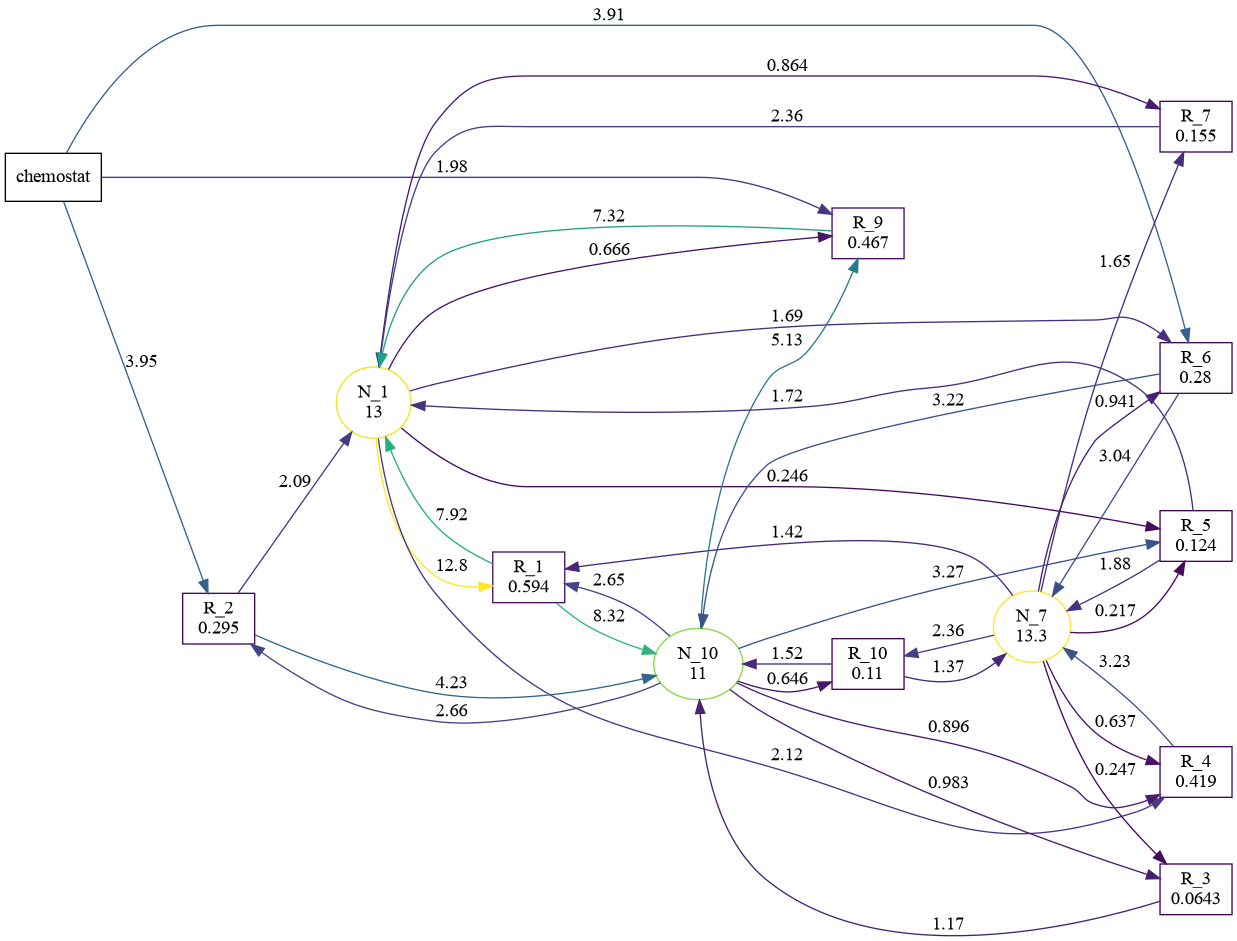

In [10]:
i = 1
ps = params[i]
ss = params_sss[i]
# ss = clamp_ss(ss)

g = diagram_sfss_v3(ps, ss;
    # strain_threshold=threshold_func1(ss[1:Ns]),
    strain_threshold=1.,
    # strain_threshold=-Inf,
    # edge_threshold=1e-10,
    # edge_threshold=-Inf,
    edge_threshold=0.1,
    colorscale=identity,
    # cluster=true,
)
# GraphvizDotLang.save(g, "kak.pdf"; format="pdf")

In [897]:
L = 3
xx = all_simple_paths(mg, 8, 1:nv(mg); cutoff=L)
i = 1
for p in xx
    if i == 10000000
        break
    end
    i += 1
    if length(p) == L
        @show p
        if p[begin] == p[end]
        end
    end
end
@show i

p = [8, 14, 2]
p = [8, 14, 4]
p = [8, 15, 2]
p = [8, 15, 3]
p = [8, 15, 5]
p = [8, 15, 6]
p = [8, 15, 9]
p = [8, 15, 11]
p = [8, 15, 12]
p = [8, 16, 2]
p = [8, 16, 3]
p = [8, 16, 4]
p = [8, 16, 6]
p = [8, 16, 7]
p = [8, 16, 9]
p = [8, 16, 11]
p = [8, 17, 2]
p = [8, 17, 4]
p = [8, 17, 5]
p = [8, 17, 6]
p = [8, 17, 7]
p = [8, 17, 11]
p = [8, 17, 12]
p = [8, 18, 2]
p = [8, 18, 3]
p = [8, 18, 6]
p = [8, 18, 7]
p = [8, 18, 9]
p = [8, 18, 10]
p = [8, 19, 2]
p = [8, 19, 3]
p = [8, 19, 9]
p = [8, 19, 10]
p = [8, 19, 11]
p = [8, 20, 2]
p = [8, 20, 4]
p = [8, 20, 5]
p = [8, 20, 10]
p = [8, 22, 2]
p = [8, 22, 4]
p = [8, 22, 5]
p = [8, 22, 7]
p = [8, 22, 9]
p = [8, 22, 10]
p = [8, 22, 11]
p = [8, 22, 12]
i = 325


325

Note that these will probably suck due to the different kinds of nodes as these clustering metrics are based on numbers of closed and open triangles however we won't have closed triangles as we only have arrows between strains and resources meaning a closed loop can only happen with even numbers of nodes.

In [764]:
global_clustering_coefficient(mg)

0.0343108504398827

In [768]:
label_for(mg, 3)

S(1)

In [767]:
xx1 = local_clustering.(Ref(mg), 1:nv(mg))
xx2 = local_clustering_coefficient.(Ref(mg), 1:nv(mg))
[(a[1], a[2], b) for (a, b) in zip(xx1, xx2)]

22-element Vector{Tuple{Int64, Int64, Float64}}:
 (0, 0, 0.0)
 (0, 380, 0.0)
 (7, 156, 0.04487179487179487)
 (8, 182, 0.04395604395604396)
 (5, 110, 0.045454545454545456)
 (6, 132, 0.045454545454545456)
 (6, 132, 0.045454545454545456)
 (8, 182, 0.04395604395604396)
 (7, 156, 0.04487179487179487)
 (6, 132, 0.045454545454545456)
 (7, 156, 0.04487179487179487)
 (7, 156, 0.04487179487179487)
 (4, 110, 0.03636363636363636)
 (2, 110, 0.01818181818181818)
 (6, 156, 0.038461538461538464)
 (6, 182, 0.03296703296703297)
 (6, 210, 0.02857142857142857)
 (5, 132, 0.03787878787878788)
 (5, 132, 0.03787878787878788)
 (4, 132, 0.030303030303030304)
 (4, 132, 0.030303030303030304)
 (8, 240, 0.03333333333333333)

In [659]:
xx = collect(Graphs.weights(mg));
extrema(xx)

(-3.579110212079973e-18, 10000.0)

In [729]:
pp = mcl(xx; inflation=10)
@show pp.counts
pp.assignments

pp.counts = [15, 6]


21-element Vector{Int64}:
 1
 2
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 2
 1
 2
 2
 2
 1
 2
 1

In [702]:
pp.counts

2-element Vector{Int64}:
 15
  6

In [332]:
# Steady state
u0 = make_u0_smart(ps; u0=:onlyN)
ssp = make_mmicrm_ss_problem(ps, u0)
@time sss = solve(ssp, DynamicSS(QNDF());
    abstol=eps(),
    reltol=eps(),
    callback=nothing,
);
maximum(abs, sss.resid)

 12.828470 seconds (14.41 M allocations: 873.274 MiB, 3.71% gc time, 96.37% compilation time)


5.498623194879823e-15

  0.001442 seconds (695 allocations: 133.234 KiB)


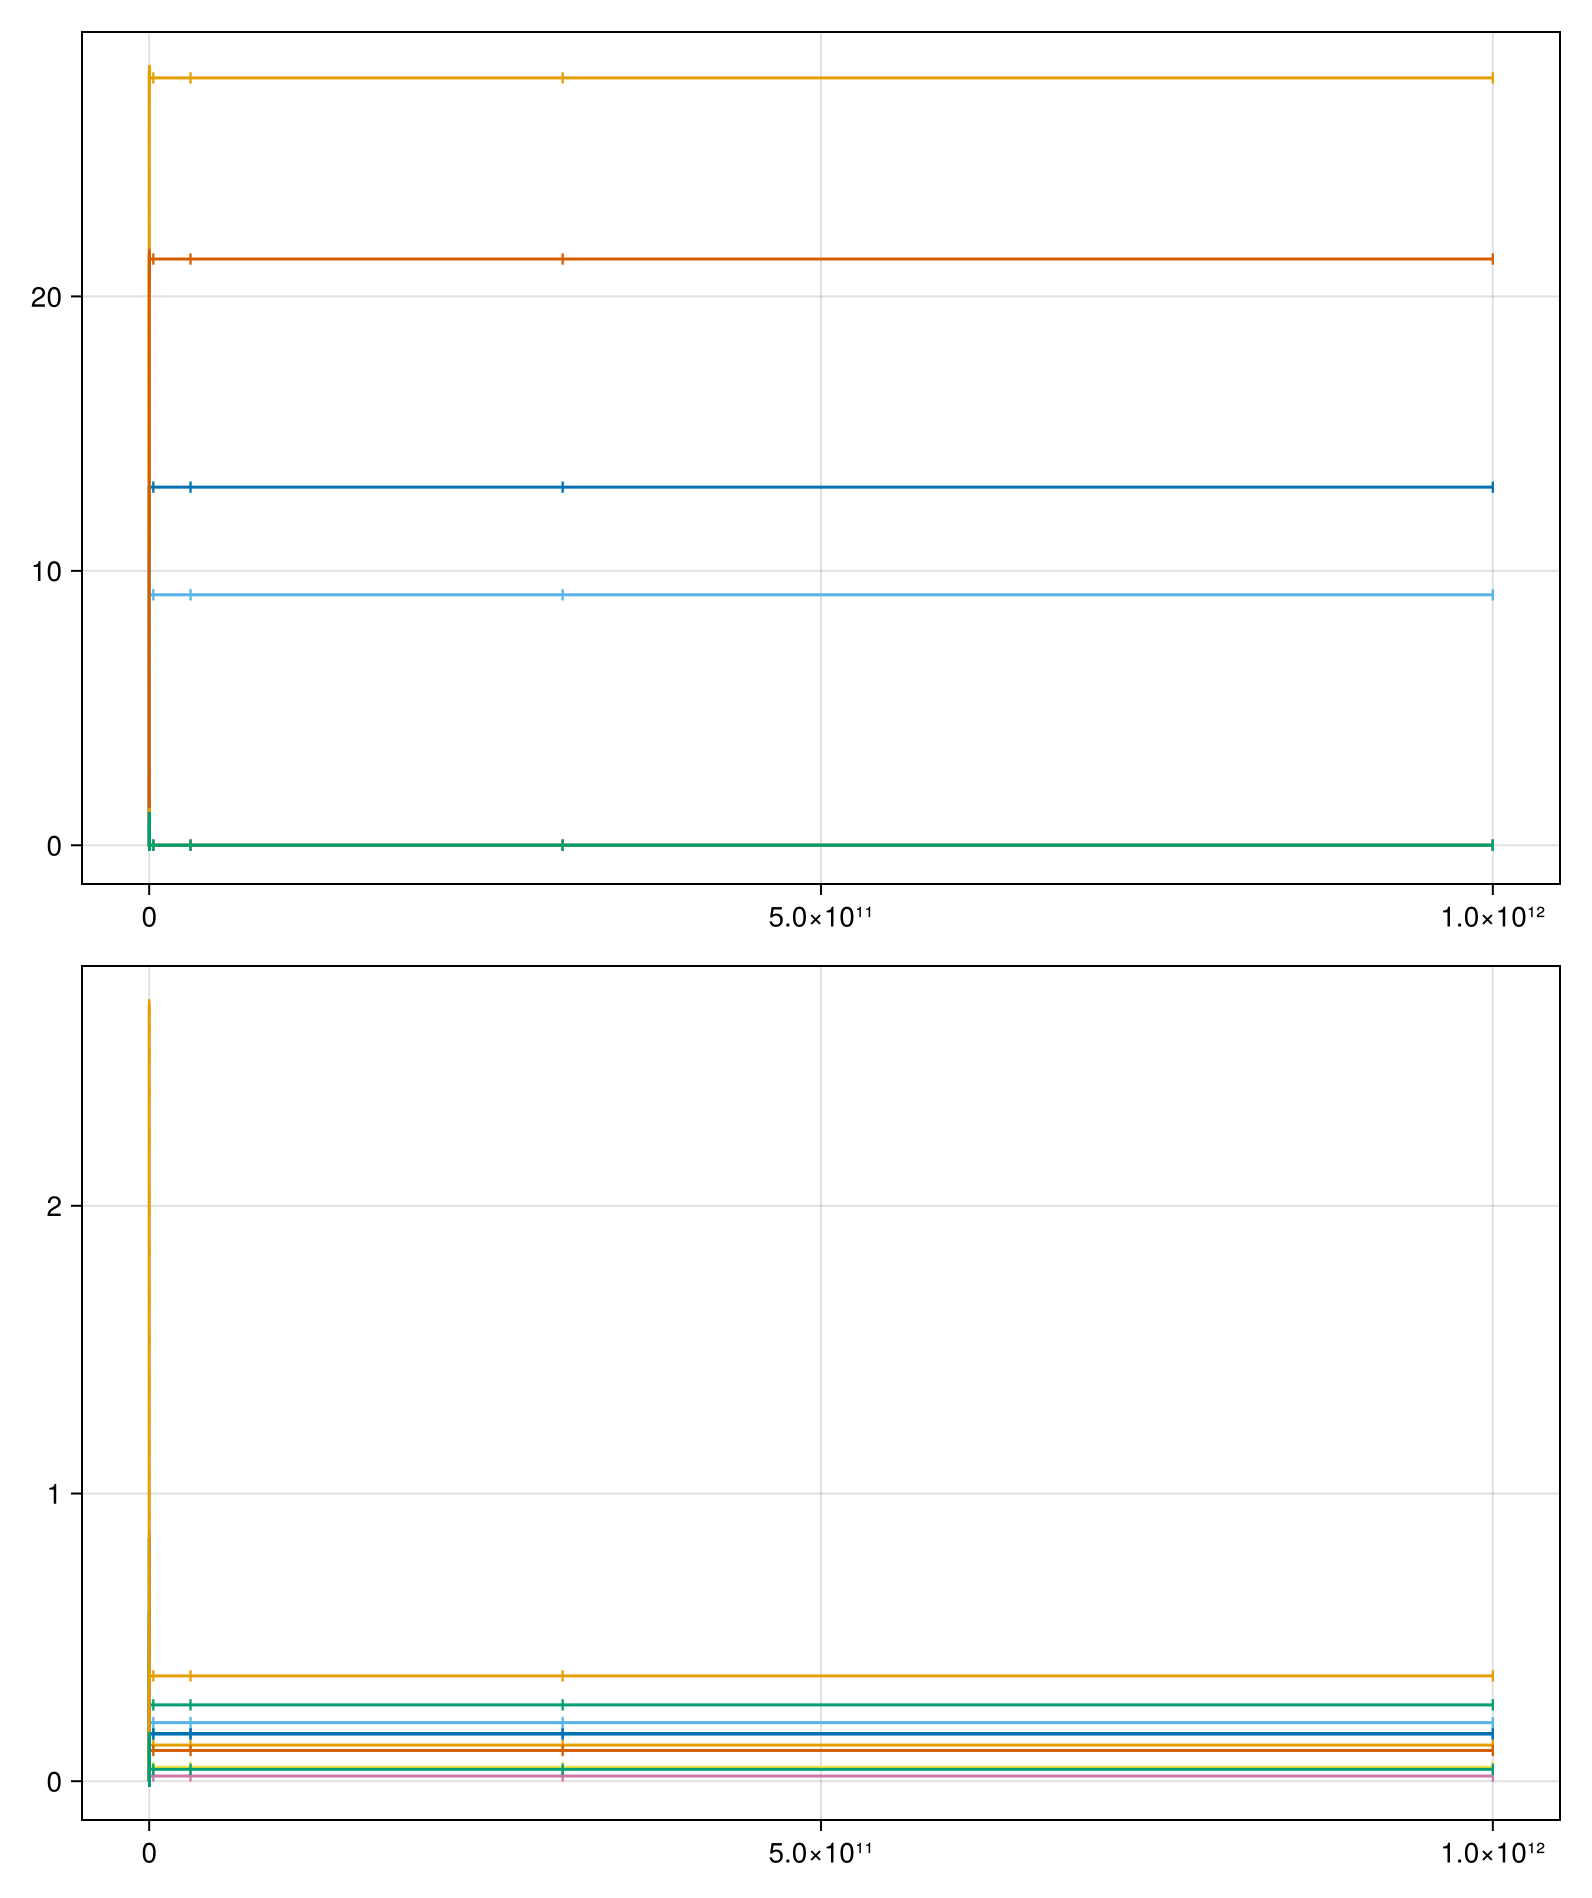

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict

In [1018]:
# Fixed time with evolution
u0 = make_u0_smart(ps; u0=:onlyN);
p = make_mmicrm_problem(ps, u0, 1000000000000);
# p = remake_guarantee_positive(p)

@time s = solve(p, QNDF();
    callback=make_timer_callback(0.5)
)

f = plot_mmicrm_sol(s)
display(GLMakie.Screen(), f)
f

# Testing noisy optimization

In [44]:
using OptimizationOptimJL, OptimizationBBO, OptimizationNOMAD

In [38]:
function tfunc1(m, s=1, N=5)
    d = Normal(m, s)
    sleep(0.1)
    mean(rand(d, N))
end

tfunc1 (generic function with 3 methods)

In [39]:
opf = OptimizationFunction((u,p)->tfunc1(u[1]))
opp = OptimizationProblem(opf, [-2.]; lb=[-10.], ub=[1000])
# opp = OptimizationProblem(opf, [-2.])

OptimizationProblem. In-place: true
u0: 1-element Vector{Float64}:
 -2.0

In [42]:
@time s = solve(opp, OptimizationBBO.BBO_generating_set_search(); maxtime=1)

  1.314570 seconds (316 allocations: 16.781 KiB)


retcode: MaxTime
u: 1-element Vector{Float64}:
 -9.996961195627406

In [43]:
s.original.f_calls

12

# Extra

In [189]:
GC.gc()
empty!(Out)
GC.gc()